In [10]:
import matplotlib.font_manager
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

plt.rcParams["font.family"] = "TeX Gyre Schola Math"

print("Disc Model")

Disc Model


## Data extraction

In here we are going to extract the values that we need from the columns of the txt file $'VelRad.txt'$. This data comes from the article of Chemin and al. from 2009 and will be used to model the disc of M31.

In [12]:
#Create some empty lists and an angle allowing us to plot ellipses
t = np.linspace(0, 2*np.pi, 3000)
x, y, z = [], [], [] #Contain the positions after the inclination but not after the PA rotation
a, b    = [], [] #semi-major axis and semi-minor axis
radius  = [] #Radius from the center in arcmin
PAang   = [] #Position angle in degrees
iang    = [] #Inclination angle in degrees
veloc   = [] #Velocity in km/s
dens    = [] #Surface density in solar masses per parsec

#We first extract our data
f = open('VelRad.txt', 'r')

for line in f:
    columns = line.split()
    Test = True
    try:
        A = float(columns[0])/60
        B = float(columns[4])*np.pi/180
        C = float(columns[7])*np.pi/180
        D = float(columns[8])
        E = float(columns[10])
    except:
        Test = False
        
    if Test == True:
        radius.append(A)
        PAang.append(np.pi/2 - B)
        iang.append(C)
        veloc.append(D)
        dens.append(E)
        
        
#The x, y, z lists will be lists of lists for each radius and we already make the inclination transformation
for i in range(len(radius)):
    if radius[i] < 2.7:
        a.append(radius[i])
        b.append(radius[i]*np.cos(iang[i]))
        x.append(a[i]*np.cos(t))
        y.append(b[i]*np.sin(t))
        z.append(-radius[i]*np.sin(iang[i])*np.sin(t))
    else:
        break
        
X, Y, Z = [], [], []

#We treat the PA rotation independently now
for i in range(len(x)):
    X.append(x[i]*np.cos(PAang[i]) - y[i]*np.sin(PAang[i]))
    Y.append(x[i]*np.sin(PAang[i]) + y[i]*np.cos(PAang[i]))
    
#This will later be used and simply indicates the kind of rotation that needs to be perform to "de-rotate M31"
#along the PA angle 
Back1X, Back1Y = [], []
    
for i in range(len(x)):
    Back1X.append(X[i]*np.cos(PAang[i]) + Y[i]*np.sin(PAang[i]))
    Back1Y.append(-X[i]*np.sin(PAang[i]) + Y[i]*np.cos(PAang[i]))
    
#This will later be used and simply indicates the kind of rotation that needs to be perform to "de-rotate M31"
#along the PA angle 
Back2X, Back2Y = [], []

for i in range(len(x)):
    Back2X.append(X[i]*np.cos(PAang[i]) + Y[i]*np.sin(PAang[i]))
    Back2Y.append((-X[i]*np.sin(PAang[i]) + Y[i]*np.cos(PAang[i]))/np.cos(iang[i]))


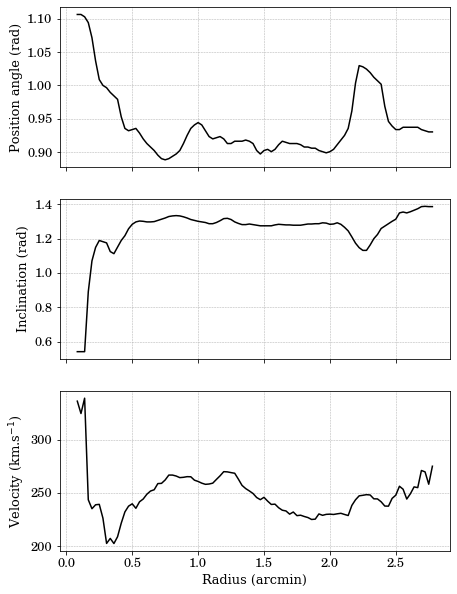

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(7, 10))

ax1.plot(radius, PAang, c='black')
ax1.set_ylabel('Position angle (rad)', fontname = 'Serif', size = 13)
ax1.grid(linestyle='--', linewidth ='0.5')
ax1.yaxis.set_tick_params(labelsize=13)

ax2.plot(radius, iang, c='black')
ax2.set_ylabel('Inclination (rad)', fontname = 'Serif', size = 13)
ax2.grid(linestyle='--', linewidth ='0.5')
ax2.yaxis.set_tick_params(labelsize=13)

ax3.plot(radius, veloc, c='black')
ax3.set_xlabel('Radius (arcmin)', fontname = 'Serif', size = 13)
ax3.set_ylabel(r'Velocity (km.s$^{-1}$)', fontname = 'Serif', size = 13)
ax3.grid(linestyle='--', linewidth ='0.5')
ax3.xaxis.set_tick_params(labelsize=13)
ax3.yaxis.set_tick_params(labelsize=13)

#plt.savefig('PosIncVel.pdf')
plt.show()

## Representation of M31 model

Here we show how M31 should look based on the model and where the gradient represents the depth.

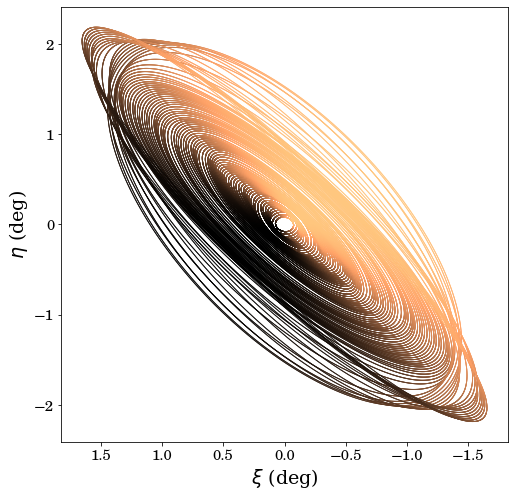

In [14]:
plt.figure(figsize=(8, 8))
for i in range(len(x)):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 19)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 19)
plt.gca().invert_xaxis()
#plt.savefig('Galaxie.png', dpi=500)
plt.show()

## Ellipse check:

In [15]:
def EllipsesCrossed(X, Y, PA, a, b): 
    #___ Description_____________________________________________________________________________________
    #Arguments:: position of the point of interest, and different lists of the PA angles, and semi-major
    #           and semi-minor axis
    #Returns:: a list with all the ellipses crossed by the point of interest X, Y
    #____________________________________________________________________________________________________

    COUNT = 0
    EllipseList = []
    
    def Condition(x, y, count, pa, A, B):
        R_rot1   = np.array([[np.cos(np.pi/2 - pa[count]), -np.sin(np.pi/2 - pa[count])], [np.sin(np.pi/2 - pa[count]), np.cos(np.pi/2 - pa[count])]])   
        Ell_rot1 = np.dot(R_rot1, [x, y]) 
        R_rot2   = np.array([[np.cos(np.pi/2 - pa[count-1]), -np.sin(np.pi/2 - pa[count-1])], [np.sin(np.pi/2 - pa[count-1]), np.cos(np.pi/2 - pa[count-1])]])   
        Ell_rot2 = np.dot(R_rot2, [x, y]) 
        
        if count == 0: #The first ellipse forms a full area
            if (Ell_rot1[0]**2)/(B[count]**2) + (Ell_rot1[1]**2)/(A[count]**2) <= 1:
                Condition = True
            else:
                Condition = False

        else: #The rest is just rings
            if (Ell_rot1[0]**2)/(B[count]**2) + (Ell_rot1[1]**2)/(A[count]**2) <= 1 and (Ell_rot2[0]**2)/(B[count-1]**2) + (Ell_rot2[1]**2)/(A[count-1]**2) >= 1:
                Condition = True

            else:
                Condition = False

        return Condition
    
    for i in range(len(a) - 1):
        IsIt = Condition(X, Y, i, PA, a, b)
        if IsIt == True:
            COUNT += 1
            EllipseList.append(i)
        else:
            continue

    return EllipseList

[1]


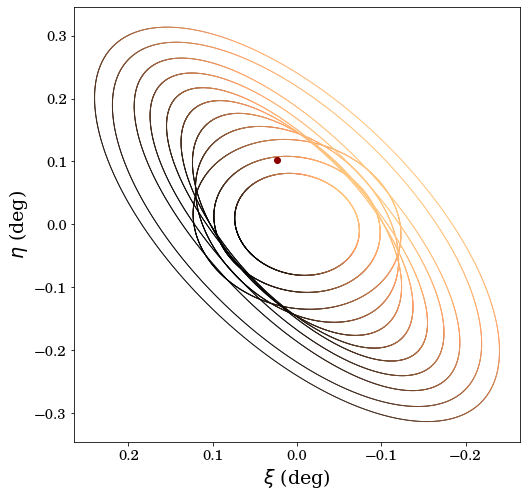

In [16]:
plt.figure(figsize=(8, 8))
for i in range(11):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
    
xrand = random.uniform(-1, 1)*0.19
yrand = random.uniform(-1, 1)*0.19

print(EllipsesCrossed(xrand, yrand, PAang, a, b))

plt.scatter(xrand, yrand, c='darkred')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 19)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 19)
plt.gca().invert_xaxis()
plt.show()

### Rapid check of the selection

Indeed the selection is made using the fact that we define the "area" between two ellipses by the area defined by the two neighbouring ones.

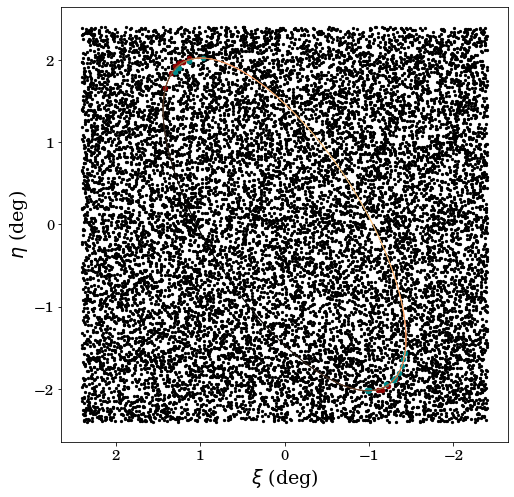

In [17]:
def Condition(x, y, count, pa, A, B):
    R_rot1   = np.array([[np.cos(np.pi/2 - pa[count]), -np.sin(np.pi/2 - pa[count])], [np.sin(np.pi/2 - pa[count]), np.cos(np.pi/2 - pa[count])]])   
    Ell_rot1 = np.dot(R_rot1, [x, y]) 
    R_rot2   = np.array([[np.cos(np.pi/2 - pa[count-1]), -np.sin(np.pi/2 - pa[count-1])], [np.sin(np.pi/2 - pa[count-1]), np.cos(np.pi/2 - pa[count-1])]])   
    Ell_rot2 = np.dot(R_rot2, [x, y]) 
    
    if (Ell_rot1[0]**2)/(B[count]**2) + (Ell_rot1[1]**2)/(A[count]**2) <= 1 and (Ell_rot2[0]**2)/(B[count-1]**2) + (Ell_rot2[1]**2)/(A[count-1]**2) >= 1:
        Condition = True
        
    else:
        Condition = False
    
    return Condition

XRand, YRand = [], []

for i in range(15000):
    XRand.append(random.uniform(-1, 1)*2.4)
    YRand.append(random.uniform(-1, 1)*2.4)
    
In1X = [] #Empty list that will contain the X coordonnates of the points inside of the ellipse
In1Y = []
In2X = [] #Empty list that will contain the X coordonnates of the points inside of the ellipse
In2Y = []
OutX = [] #Empty list that will contain the X coordonnates of the points outside of the ellipse
OutY = []

EL1 = 81
EL2 = 80

for i in range(0, 15000): #Verifies if a point is inside or ouside
    if (Condition(XRand[i], YRand[i], EL1, PAang, a, b) == True):
        In1X.append(XRand[i])
        In1Y.append(YRand[i])
        
    if (Condition(XRand[i], YRand[i], EL2, PAang, a, b) == True):
        In2X.append(XRand[i])
        In2Y.append(YRand[i])
        
    else:
        OutX.append(XRand[i])
        OutY.append(YRand[i])
        
plt.figure(figsize=(8, 8))
plt.scatter(OutX, OutY, c='black', s=5)
plt.scatter(In1X, In1Y, c='darkred', s=20)
plt.scatter(In2X, In2Y, c='darkcyan', s=20)
plt.scatter(X[EL2], Y[EL2], c=-z[EL2], cmap='copper', s=1, linewidth=0)
#plt.scatter(-0.12789997597689204, -0.17891212807791168, c="red", s=0.5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 19)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 19)
plt.gca().invert_xaxis()
plt.show()

## Weighted average

In this section what we would like to get is the following. Basically, what we have for now is the number of ellipses crossed at a given position in space, but we remind that we would like to return a single velocity. To do so, we weight the velocities given for the different ellipses based on their surface densities.

In [18]:
def AvgWeight(EllList, Dens): #takes as argument a list of the ellipses crossed and the densities of ALL the ellipses
    velocity = 0
    totell   = len(EllList) #total number of ellipses crossed
    
    if totell == 0:
        velocity = 0
        
    else: 
        SumDens = 0 #Sum of the different densities of the different ellipses
        for i in range(totell):
            SumDens += Dens[EllList[i]]           
        
        Weights = []
        for i in range(totell):
            Weights.append((Dens[EllList[i]])/SumDens)
            
    return Weights
        
El = EllipsesCrossed(xrand, yrand, PAang, a, b)
print(AvgWeight(El, dens))

[1.0]


## Test of velocity for a face on circle

We will here test to recover the velocities along the $\alpha$ and $\delta$ components for objects all having a velocity of constant norm equal to 42km.s$^{-1}$ and belonging to a disc seen face on.

In [19]:
def Angle02pi(angle, x, y, vel):
    velcom = []
    if x < 0 and y > 0:
        angle = (np.pi/2 + angle) + np.pi/2 
    if x < 0 and y < 0:
        angle += np.pi
    if x > 0 and y < 0:
        angle += 2*np.pi
    else:
        angle *= 1
        
    velcom.append(-vel*np.sin(angle))
    velcom.append(vel*np.cos(angle))
    
    return velcom

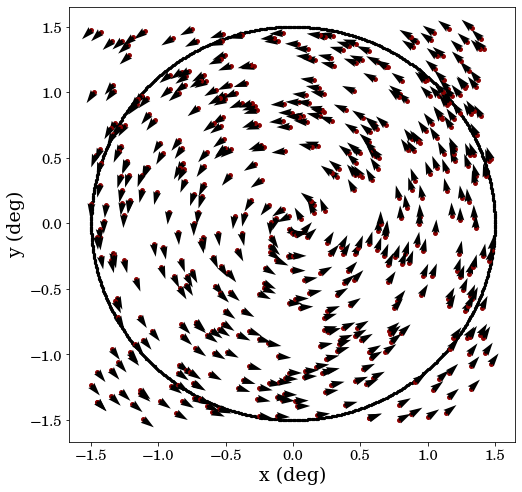

In [20]:
#Create some empty lists and an angle allowing us to plot ellipses
ttest  = np.linspace(0, 2*np.pi, 1000)
xtest, ytest = [], []
velo   = 0.1
velcom = []

XRanD, YRanD = [], []

#The x, y, z lists will be lists of lists for each radius and we already make the inclination transformation
xtest.append(1.5*np.cos(ttest))
ytest.append(1.5*np.sin(ttest))

#Random numbers for the test
for i in range(500):
    XRanD.append(random.uniform(-1, 1)*1.5)
    YRanD.append(random.uniform(-1, 1)*1.5)
    AnglE  = np.arctan(YRanD[i]/XRanD[i])
    velcom.append(Angle02pi(AnglE, XRanD[i], YRanD[i], velo))
    
plt.figure(figsize=(8, 8))
plt.scatter(xtest, ytest, c='black', s=5)
for i in range(len(XRanD)):
    plt.scatter(XRanD[i], YRanD[i], c='darkred', s=15)
    plt.quiver(XRanD[i], YRanD[i], velcom[i][0], velcom[i][1], angles='xy', scale_units='xy', scale=1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'x (deg)', fontname = 'Serif', size = 19)
plt.ylabel(r'y (deg)', fontname = 'Serif', size = 19)
plt.show()

## Making bins hard version

The first step is to make bins in which we will then create a series of points that will then allow us to determine a sort of average value in a given cell. The number of cells in both the $\xi$ and $\eta$ directions are defined by the variables nb_x_bins (-1, hence for nb_x_bins = 3 we only have 2) and the number of points in each cells is N (-2 because of the two boundary values on each side).

In [21]:
def matrix(cell_bounds_min_x, cell_bounds_max_x, cell_bounds_min_y, cell_bounds_max_y, n): 
    #This function creates a meshgrid, its arguments are boundaries on the x and y axis
    #for each of the sub-cells that we've created we take n points inside  
    x_coord = []
    y_coord = []
    
    xedge   = np.linspace(cell_bounds_min_x, cell_bounds_max_x, n)
    yedge   = np.linspace(cell_bounds_min_y, cell_bounds_max_y, n)

    for i in range(1, n-1):
        for j in range(1, n-1):
            x_coord.append(xedge[j])
            y_coord.append(yedge[i])
            
    return x_coord, y_coord

In [22]:
def mesh(nb_x_bins, nb_y_bins, n_points_bin):
    #___ Description_____________________________________________________________________________________
    #Arguments:: number of bins along x (xi) and y (eta) axis and the number of points inside of each bin
    #Returns:: coordinates of all the points inside each bin, see function matrix to learn more
    #____________________________________________________________________________________________________
    edgex = np.linspace(-1.8, 1.8, nb_x_bins)
    edgey = np.linspace(-2.35, 2.35, nb_y_bins)

    edge_x = []
    edge_y = []

    for i in range(nb_x_bins - 1):
        edge_x.append([edgex[i], edgex[i+1]])
        
    for i in range(nb_y_bins - 1):
        edge_y.append([edgey[i], edgey[i+1]])

    xcoord, ycoord = [], []

    for i in range(len(edge_x)):
        for j in range(len(edge_y)):
            R, B = matrix(edge_x[i][0], edge_x[i][1], edge_y[j][0], edge_y[j][1], n_points_bin)
            xcoord.append(R)
            ycoord.append(B)
            
    return xcoord, ycoord

In [23]:
xcoord, ycoord = mesh(7, 7, 7)

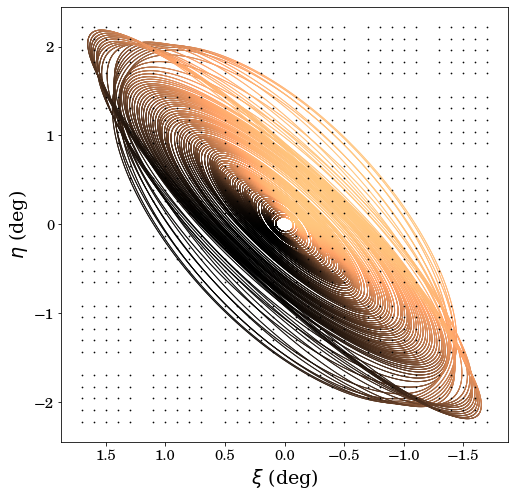

In [24]:
plt.figure(figsize=(8, 8))
for i in range(len(x)):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
plt.scatter(xcoord, ycoord, s=0.5, c='k')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 19)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 19)
plt.gca().invert_xaxis()
plt.show()

## Interlude about average velocities

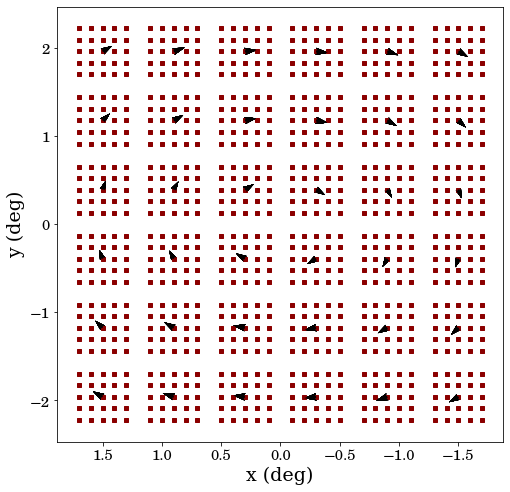

In [25]:
def velocity(xcoord, ycoord):
    velcom = [] #will contain the velocities of all the points inside of the bin
    velbin = [] #Stores only the averaged velocity of all the points in the bin
    for i in range(len(xcoord)):
        velcom.append([])
        velbin.append([])
        vel_x = 0 #intermediate variable to calculate the average velocity in a given cell
        vel_y = 0
    
        for j in range(len(xcoord[0])):
            AnglE  = np.arctan(ycoord[i][j]/xcoord[i][j])
            velcom[i].append(Angle02pi(AnglE, xcoord[i][j], ycoord[i][j], velo)) 
            vel_x += velcom[i][j][0]
            vel_y += velcom[i][j][1]
        
        velbin[i].append(vel_x/len(xcoord[0]))
        velbin[i].append(vel_y/len(xcoord[0]))
        
    return velbin

vel = velocity(xcoord, ycoord)

plt.figure(figsize=(8, 8))
for i in range(len(xcoord)):
    for j in range(len(xcoord[0])):
        plt.scatter(xcoord[i], ycoord[i], c='darkred', s=15)
        plt.quiver(xcoord[i][int(len(xcoord[0])/2 - 1/2)], ycoord[i][int(len(xcoord[0])/2 - 1/2)], vel[i][0], 
        vel[i][1], angles='xy', scale_units='xy', scale=1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('x (deg)', fontname = 'Serif', size = 19)
plt.ylabel('y (deg)', fontname = 'Serif', size = 19)
plt.gca().invert_xaxis()
plt.show()

Just for clarity, we will quickly explain the notation of xcoord\[\]\[\]. In that notation the first \[\] designates the cell in wich we are and while the second designates the points inside the cell which will be used to evaluate the global trend of the vectors.

For the velcom list it's exactly the same except that the third \[\] is used to determine if it is the component of velocity along the x or the y axis (in our case more precisely along the $\xi$ or $\eta$ axis).

## Making bins easy version

In [26]:
def mesh_bins(size_xbins, size_ybins): #in arcmin
    #___ Description_____________________________________________________________________________________
    #Arguments:: the size of the bins that we want along the x (xi) and y (eta) axis 
    #Returns:: the coordinates of the bins and a list of the boundaries of each of those bins
    #____________________________________________________________________________________________________

    x_coord, y_coord   = [], []
    centre_x, centre_y = [], []
    x_border, y_border = [], []
    
    lower_x_bound = -1.8
    upper_x_bound =  1.8
    lower_y_bound = -2.35
    upper_y_bound =  2.35
    
    #What is the total length of our interval
    length_x_tot = upper_x_bound - lower_x_bound
    length_y_tot = upper_y_bound - lower_y_bound
    
    #How many cells should we have, the '/60' comes from the fact that the user enters the sizes of the 
    #bins in arcmin and that the upper and lower bounds are defined in degrees
    nb_x_bins = int(length_x_tot/(size_xbins/60))
    nb_y_bins = int(length_y_tot/(size_ybins/60))
    
    #We define the list of the x and y of all the centres and then we remove the two boundaries
    edges_x = np.linspace(lower_x_bound, upper_x_bound, nb_x_bins) 
    edges_y = np.linspace(lower_y_bound, upper_y_bound, nb_y_bins)
    
    #Calculates the actual final size of the bins used in degrees
    dx = edges_x[1] - edges_x[0]
    dy = edges_y[1] - edges_y[0]
    
    #Calculates the actual final size of the bins used in arcmin and rounded
    size_xbins = round(dx*60, 3)
    size_ybins = round(dy*60, 3)
    
    #Determine the centers of every bins  
    for i in range(len(edges_x) - 1):
        centre_x.append(edges_x[i] + (0.5)*dx)
        
    for i in range(len(edges_y) - 1):
        centre_y.append(edges_y[i] + (0.5)*dy)
      
    #Define the actual matrix representing the coordinates of the centres and the limits of each bins
    for i in range(len(centre_x)):
        x_coord.append([])
        y_coord.append([])
        x_border.append([])
        y_border.append([])
        for j in range(len(centre_y)):
            x_border[i].append([])
            y_border[i].append([])
            
            x_coord[i].append(centre_x[i])
            y_coord[i].append(centre_y[j]) 
            
            x_border[i][j].append(edges_x[i])
            x_border[i][j].append(edges_x[i+1])
            y_border[i][j].append(edges_y[j])
            y_border[i][j].append(edges_y[j+1])
                           
    print(f'The actual size of the bins that you have chosen are {size_xbins}\' for the x axis and {size_ybins}\' for the y axis')
    return x_coord, y_coord, x_border, y_border

xcoord, ycoord, xedges, yedges = mesh_bins(21, 25)

The actual size of the bins that you have chosen are 24.0' for the x axis and 28.2' for the y axis


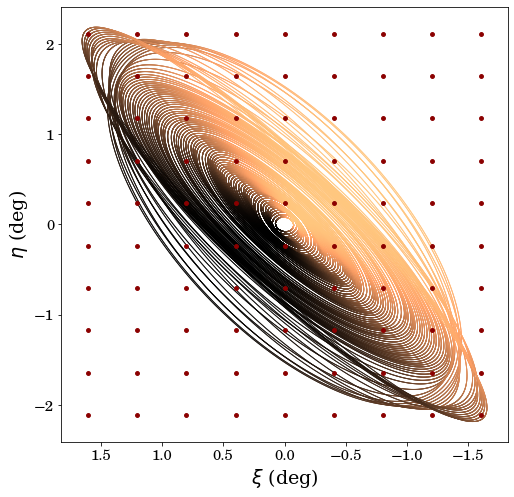

In [27]:
plt.figure(figsize=(8, 8))
for i in range(len(x)):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
#plt.scatter(X[77], Y[77], c="navy", s=5, linewidth=0)
plt.scatter(xcoord, ycoord, s=15, c='darkred')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 19)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 19)
plt.gca().invert_xaxis()
plt.show()

## Which ellipses are crossed?

We mean by the points of the mesh.

In [28]:
EllListCrossed = []
for i in range(len(xcoord)):
    EllListCrossed.append([])
    for j in range(len(ycoord[0])):
        EllListCrossed[i].append(EllipsesCrossed(xcoord[i][j], ycoord[i][j], PAang, a, b))
        
#EllListCrossed[0][0].append(0)

print(EllListCrossed)

[[[93], [], [], [], [], [], [], [], [], []], [[], [71], [64], [74, 84], [79], [], [], [], [], []], [[], [74], [50], [44], [64], [76], [], [], [], []], [[], [76], [65], [30], [27], [56], [75], [], [], []], [[], [], [75], [56], [10, 18], [10, 18], [56], [75], [], []], [[], [], [], [75], [56], [27], [30], [65], [76], []], [[], [], [], [], [76], [64], [44], [50], [74], []], [[], [], [], [], [], [79], [74, 84], [64], [71], []], [[], [], [], [], [], [], [], [], [], [93]]]


## Rotation matrices

This is finally the time of introducing functions that are returning the coordinates of points after a rotation. Indeed we could have done it since the beggining but I hadn't thought about doing it before. Their mathematical definitions are the following:

$ \hspace{21mm} A^{-1} = \begin{pmatrix}
\cos(\alpha) & -\sin(\alpha) \\
\sin(\alpha) & \cos(\alpha)
\end{pmatrix}^{-1} = \begin{pmatrix}
\cos(-\alpha) & -\sin(-\alpha) \\
\sin(-\alpha) & \cos(-\alpha)
\end{pmatrix} = \begin{pmatrix}
\cos(\alpha) & \sin(\alpha) \\
-\sin(\alpha) & \cos(\alpha)
\end{pmatrix}$

In [29]:
def RotNor(x, y, AnGlE): #Normal rotation
    #___ Description_____________________________________________________________________________________
    #Arguments:: x and y coordinates of a point and a angle of rotation  
    #Returns:: a list of the new coodinates of the point, the first element is the x coordinate while the
    #         second element is the y coordinates
    #____________________________________________________________________________________________________
    
    R_rot   = np.array([[np.cos(AnGlE), -np.sin(AnGlE)], [np.sin(AnGlE), np.cos(AnGlE)]])   
    Ell_rot = np.dot(R_rot, [x, y]) 
    return Ell_rot

In [30]:
def RotInv(x, y, AnGlE): #Inverse rotation
    #___ Description_____________________________________________________________________________________
    #Arguments:: x and y coordinates of a point and a angle of rotation  
    #Returns:: a list of the new coodinates of the point, the first element is the x coordinate while the
    #         second element is the y coordinates
    #____________________________________________________________________________________________________
    
    R_rot   = np.array([[np.cos(AnGlE), np.sin(AnGlE)], [-np.sin(AnGlE), np.cos(AnGlE)]])   
    Ell_rot = np.dot(R_rot, [x, y]) 
    return Ell_rot

## Shearing the mesh for the PA angle

We here aim to rotate the mesh in order to get back to a shape in which the major axis of M31 is aligned with the E-W axis. To do so we make use of the inverse rotation matrix (computationally represented by the RotInv function). We have to be careful about the fact that the PA angle changes for each points, which are indeed all located in different ellipses that have previously all been shifted from a different PA angle. 

Another complexity is added when two ellipses are crossed in which case it becomes necessary to average the angle with the weights of the different ellipses that is it in using the AvgWeight function.

In [31]:
def BackPA(x, y):
    #___ Description_____________________________________________________________________________________
    #Arguments:: x and y coordinates of a point 
    #Returns:: a list of the new coodinates of the point, the first element is the x coordinate while the
    #         second element is the y coordinates
    #____________________________________________________________________________________________________
    
    xnew, ynew = [], []
    
    for i in range(len(EllListCrossed)): #each of the columns (starting from the right)
        xnew.append([])
        ynew.append([])
        for j in range(len(EllListCrossed[i])): #each rows of the mesh
            
            #If the point is outside of M31, not contained inside of any ellipse, send them far away
            if len(EllListCrossed[i][j]) == 0:
                xnew[i].append(1000)
                ynew[i].append(1000)
                
            #If the point is inside one ellipse
            if len(EllListCrossed[i][j]) == 1:
                XY = RotInv(x[i][j], y[i][j], PAang[EllListCrossed[i][j][0]])
                xnew[i].append(XY[0])
                ynew[i].append(XY[1])
                
            #If the point is inside at least two ellipses
            if len(EllListCrossed[i][j]) > 1:
                TemporaryPA = 0
                Weights     = AvgWeight(EllListCrossed[i][j], dens)
                for k in range(len(Weights)):
                    TemporaryPA += Weights[k]*PAang[EllListCrossed[i][j][k]]
                    
                XY = RotInv(x[i][j], y[i][j], TemporaryPA)
                xnew[i].append(XY[0])
                ynew[i].append(XY[1])
                                   
    return xnew, ynew
                
Xx, Yy = BackPA(xcoord, ycoord)

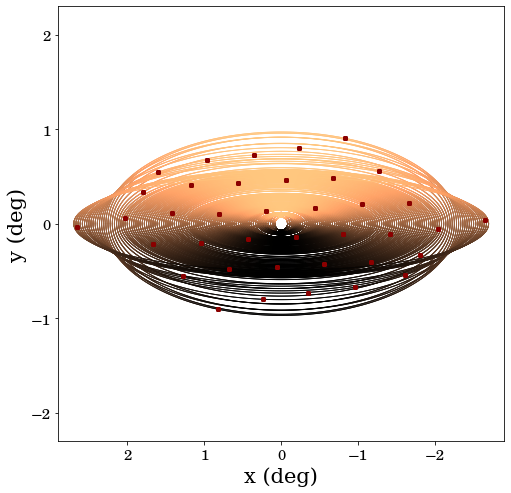

In [32]:
plt.figure(figsize=(8, 8))
for i in range(len(Back1X)):
    plt.scatter(Back1X[i], Back1Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
        
for i in range(len(Xx)):
    for j in range(len(Xx[0])):
        plt.scatter(Xx[i], Yy[i], c='darkred', s=15)

#plt.scatter(Back1X[90], Back1Y[90], c="#062e82", s=5, linewidth=0)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'x (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'y (deg)', fontname = 'Serif', size = 21)
plt.xlim(-2.9, 2.9)
plt.ylim(-2.3, 2.3)
plt.gca().invert_xaxis()
plt.show()

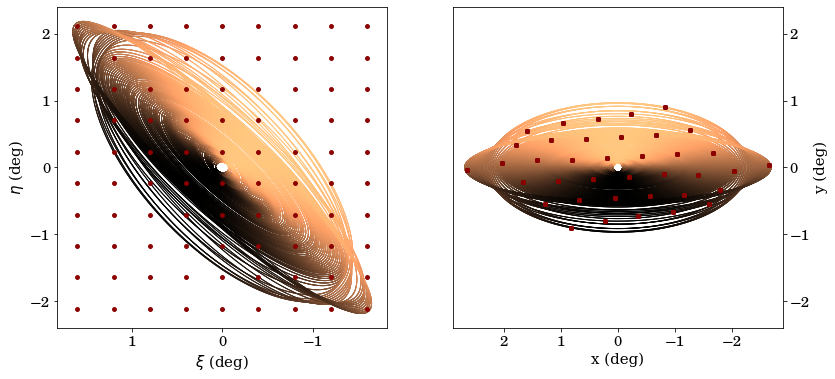

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13, 5.9))

for i in range(len(x)):
    ax1.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
ax1.scatter(xcoord, ycoord, s=15, c='darkred')
ax1.set_xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 15)
ax1.set_ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 15)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.set_xlim(ax1.get_xlim()[::-1])

for i in range(len(Back1X)):
    ax2.scatter(Back1X[i], Back1Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
for i in range(len(Xx)):
    for j in range(len(Xx[0])):
        ax2.scatter(Xx[i], Yy[i], c='darkred', s=15)
ax2.set_xlabel(r'x (deg)', fontname = 'Serif', size = 15)
ax2.set_ylabel(r'y (deg)', fontname = 'Serif', size = 15)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right') 
ax2.set_xlim(-2.9, 2.9)
ax2.set_ylim(-2.4, 2.4)
ax2.set_xlim(ax2.get_xlim()[::-1])

plt.show()

## Shearing the mesh to go back to the face on inclination

In this part we would like to go back to an inclination seen as face on, to do so we just have to divide by a cosine which is what we are going to do here.

In [34]:
def BackInc(x, y):
    #___ Description_____________________________________________________________________________________
    #Arguments:: x and y coordinates of a point 
    #Returns:: a list of the new coodinates of the point, the first element is the x coordinate while the
    #         second element is the y coordinates
    #____________________________________________________________________________________________________
    
    ynew = []
    
    for i in range(len(EllListCrossed)): #each of the columns (starting from the right)
        ynew.append([])
        for j in range(len(EllListCrossed[i])): #each rows of the mesh
            
            #If the point is outside of M31, not contained inside of any ellipse
            if len(EllListCrossed[i][j]) == 0:
                ynew[i].append(1000)
                
            #If the point is inside one ellipse
            if len(EllListCrossed[i][j]) == 1:
                ynew[i].append(y[i][j]/np.cos(iang[EllListCrossed[i][j][0]]))
                
            #If the point is inside at least two ellipses
            if len(EllListCrossed[i][j]) > 1:
                TemporaryInc = 0
                Weights      = AvgWeight(EllListCrossed[i][j], dens)
                for k in range(len(Weights)):
                    TemporaryInc += Weights[k]*iang[EllListCrossed[i][j][k]]
                    
                ynew[i].append(y[i][j]/np.cos(TemporaryInc))
                                   
    return x, ynew
                
Xxx, Yyy = BackInc(Xx, Yy)

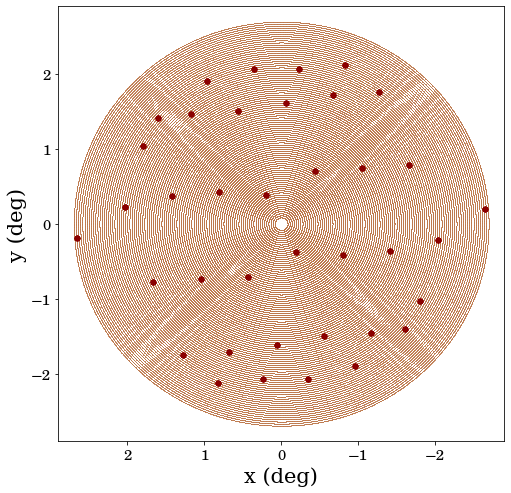

In [35]:
plt.figure(figsize=(8, 8))
for i in range(len(Back2X)):
    plt.scatter(Back2X[i], Back2Y[i], c='#bd784c', s=1, linewidth=0)
        
for i in range(len(Xx)):
    for j in range(len(Xx[0])):
        plt.scatter(Xxx[i], Yyy[i], c='darkred', s=20)

#plt.scatter(Back2X[90], Back2Y[90], c="#062e82", s=5, linewidth=0)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'x (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'y (deg)', fontname = 'Serif', size = 21)
plt.xlim(-2.9, 2.9)
plt.ylim(-2.9, 2.9)
plt.gca().invert_xaxis()
plt.show()

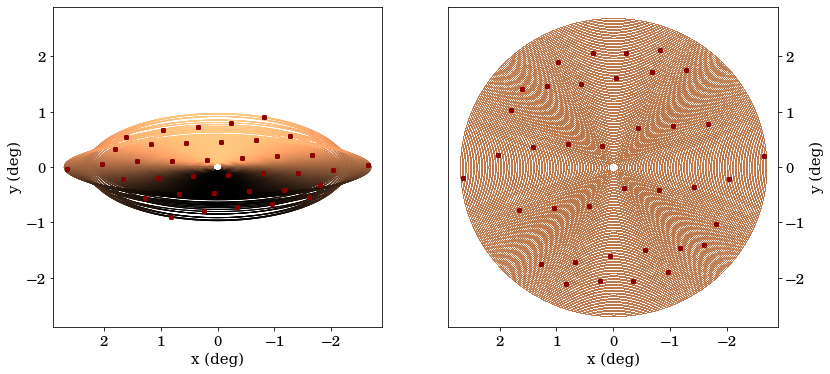

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13, 5.9))

for i in range(len(Back1X)):
    ax1.scatter(Back1X[i], Back1Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
for i in range(len(Xx)):
    for j in range(len(Xx[0])):
        ax1.scatter(Xx[i], Yy[i], c='darkred', s=15)
ax1.set_xlabel(r'x (deg)', fontname = 'Serif', size = 15)
ax1.set_ylabel(r'y (deg)', fontname = 'Serif', size = 15)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.set_xlim(-2.9, 2.9)
ax1.set_xlim(ax1.get_xlim()[::-1])

for i in range(len(Back2X)):
    ax2.scatter(Back2X[i], Back2Y[i], c='#bd784c', s=1, linewidth=0)
for i in range(len(Xxx)):
    for j in range(len(Xxx[0])):
        ax2.scatter(Xxx[i], Yyy[i], c='darkred', s=15)
ax2.set_xlabel(r'x (deg)', fontname = 'Serif', size = 15)
ax2.set_ylabel(r'y (deg)', fontname = 'Serif', size = 15)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right') 
ax2.set_xlim(-2.9, 2.9)
ax2.set_ylim(-2.9, 2.9)
ax2.set_xlim(ax2.get_xlim()[::-1])

plt.show()

## Velocity of the points of the mesh

To do so I'm going to create two functions, one finding the angle for any point on of the plane a second which "job" will be to find the velocity components of the points.

In [37]:
def Ang(x, y):
    #___ Description_____________________________________________________________________________________
    #Arguments:: an angle, and the position of the points
    #Returns:: the angle of the point 
    #____________________________________________________________________________________________________
   
    if x == 0:
        x = 0.00000000001
        
    AnglE = np.arctan(y/x)

    if x < 0 and y > 0:
        AnglE = (np.pi/2 + AnglE) + np.pi/2 
    if x < 0 and y < 0:
        AnglE += np.pi
    if x > 0 and y < 0:
        AnglE += 2*np.pi
    else:
        AnglE *= 1
  
    return AnglE


def VelCom(x, y, vel):
    #___ Description_____________________________________________________________________________________
    #Arguments:: two coordinates of a point and the velocity list from the beginning
    #Returns:: list of lists with all the components of each vector
    #____________________________________________________________________________________________________
    
    velcom = []
    
    for i in range(len(EllListCrossed)): #each of the columns (starting from the right)
        velcom.append([])
        for j in range(len(EllListCrossed[i])): #each rows of the mesh
            
            #If the point is outside of M31, not contained inside of any ellipse
            if len(EllListCrossed[i][j]) == 0:
                velcom[i].append([0, 0])
                
            #If the point is inside one ellipse
            if len(EllListCrossed[i][j]) == 1:
                velcom[i].append([])
                angle = Ang(x[i][j], y[i][j])
                velcom[i][j].append(np.sin(angle)*vel[EllListCrossed[i][j][0]])
                velcom[i][j].append(-np.cos(angle)*vel[EllListCrossed[i][j][0]])
                
            #If the point is inside at least two ellipses
            if len(EllListCrossed[i][j]) > 1:
                velcom[i].append([])
                TemporaryVel = 0
                Weights      = AvgWeight(EllListCrossed[i][j], dens)
                for k in range(len(Weights)):
                    TemporaryVel += Weights[k]*vel[EllListCrossed[i][j][k]]
                
                angle = Ang(x[i][j], y[i][j])
                velcom[i][j].append(np.sin(angle)*TemporaryVel)
                velcom[i][j].append(-np.cos(angle)*TemporaryVel)
                                   
    return velcom

A = VelCom(Xxx, Yyy, veloc)

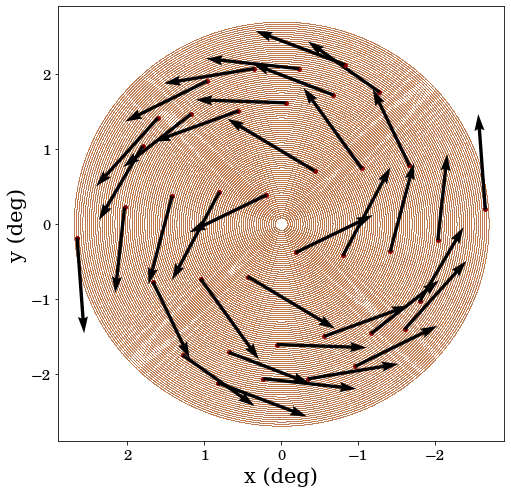

In [38]:
plt.figure(figsize=(8, 8))
for i in range(len(Back2X)):
    plt.scatter(Back2X[i], Back2Y[i], c='#bd784c', s=1, linewidth=0)
    
for i in range(len(Xxx)):
    for j in range(len(Xxx[0])):
        plt.scatter(Xxx[i][j], Yyy[i][j], c='darkred', s=15)
        plt.quiver(Xxx[i][j], Yyy[i][j], A[i][j][0]*0.005, A[i][j][1]*0.005, angles='xy', scale_units='xy', scale=1) 

        plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'x (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'y (deg)', fontname = 'Serif', size = 21)
plt.xlim(-2.9, 2.9)
plt.ylim(-2.9, 2.9)
plt.gca().invert_xaxis()
plt.show()

## Now let's go back the other way round

We start by "flattening" the vectors with still as done with the discs (simply by multiplying by the cosine of the inclination, still taking into account that the inclination differs as a function of the ellipse we are in). At the same time we are also going to make the rotation in order to go back to what we observe in the end. We will do all that in a single function.

In [39]:
def BackToFuture(x, y, vel_face_on):
    #___ Description_____________________________________________________________________________________
    #Arguments:: two coordinates of a point and a list of the velocity components
    #Returns:: list of lists with all the components as seen from Earth
    #____________________________________________________________________________________________________
    
    velcom = []
    
    for i in range(len(EllListCrossed)): #each of the columns (starting from the right)
        velcom.append([])
        for j in range(len(EllListCrossed[i])): #each rows of the mesh
            
            #If the point is outside of M31, not contained inside of any ellipse
            if len(EllListCrossed[i][j]) == 0:
                velcom[i].append([0, 0, 0])
                
            #If the point is inside one ellipse
            if len(EllListCrossed[i][j]) == 1:
                velcom[i].append([])
                #Inclination
                x_comp = vel_face_on[i][j][0]
                y_comp = vel_face_on[i][j][1]*np.cos(iang[EllListCrossed[i][j][0]])
                z_comp = vel_face_on[i][j][1]*np.sin(iang[EllListCrossed[i][j][0]])
                
                #PA rotation
                final = RotNor(x_comp, y_comp, PAang[EllListCrossed[i][j][0]])
                velcom[i][j].append(final[0])
                velcom[i][j].append(final[1])
                velcom[i][j].append(z_comp)
                
            #If the point is inside at least two ellipses
            if len(EllListCrossed[i][j]) > 1:
                velcom[i].append([])
                TemporaryInc = 0
                Weights      = AvgWeight(EllListCrossed[i][j], dens)
                for k in range(len(Weights)):
                    TemporaryInc += Weights[k]*iang[EllListCrossed[i][j][k]]
                
                x_comp = vel_face_on[i][j][0]
                y_comp = vel_face_on[i][j][1]*np.cos(TemporaryInc)
                z_comp = vel_face_on[i][j][1]*np.sin(TemporaryInc)
                
                TemporaryPA = 0
                for k in range(len(Weights)):
                    TemporaryPA += Weights[k]*PAang[EllListCrossed[i][j][k]]
                                        
                final = RotNor(x_comp, y_comp, TemporaryPA)
                velcom[i][j].append(final[0])
                velcom[i][j].append(final[1])
                velcom[i][j].append(z_comp)
                                   
    return velcom

B = BackToFuture(Xxx, Yyy, A)

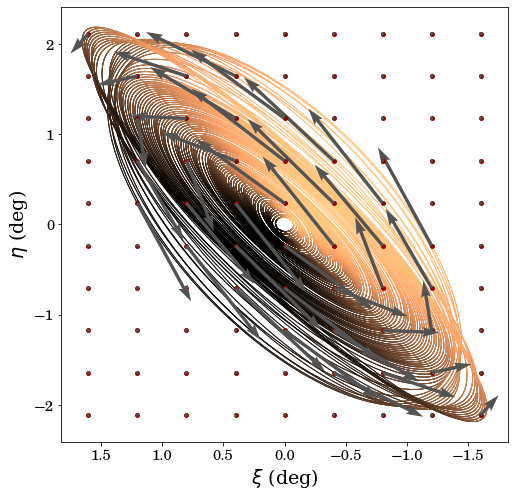

In [40]:
plt.figure(figsize=(8, 8))
#Plot the background:
for i in range(len(x)):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)

#Plot the mesh and the vectors:
for i in range(len(xcoord)):
    for j in range(len(ycoord[0])):
        plt.scatter(xcoord[i][j], ycoord[i][j], c='darkred', s=15)
        plt.quiver(xcoord[i][j], ycoord[i][j], B[i][j][0]*0.005, B[i][j][1]*0.005, angles='xy', scale_units='xy', scale=1, color='#535353') 
        #plt.quiver(xcoord[i][j], ycoord[i][j], B[i][j][0]*0.001, B[i][j][1]*0.001, angles='xy', scale_units='xy', scale=1, color='red') 


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 19)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 19)
plt.gca().invert_xaxis()
#plt.savefig('kibhsdf.png', dpi=500)
plt.show()

## Accounting for the motion of the Sun 

We are first going to do all the previous steps over again but without plotting all the steps this time, we just want the results.

In [93]:
#Creating the mesh
xcoord, ycoord, xedges, yedges = mesh_bins(21, 25) 

#Which ellipses are crossed by the points of the mesh
EllListCrossed = []
for i in range(len(xcoord)):
    EllListCrossed.append([])
    for j in range(len(ycoord[0])):
        EllListCrossed[i].append(EllipsesCrossed(xcoord[i][j], ycoord[i][j], PAang, a, b))

#First "de-rotation" to go back to where PA would be null
Xx, Yy = BackPA(xcoord, ycoord)

#Second "de-rotation" to go back to a face on view of M31
Xxx, Yyy = BackInc(Xx, Yy)

#Get the components of the velocities if as seen face on
A = VelCom(Xxx, Yyy, veloc)

#Converts the components as if seen from where we are 
B = BackToFuture(Xxx, Yyy, A)

The actual size of the bins that you have chosen are 24.0' for the x axis and 28.2' for the y axis


### We first create a function that is going to substract the reflex motion

In [94]:
def HelioVel(vel_list, vel_l, vel_b, vel_r):
    #___ Description_____________________________________________________________________________________
    #Arguments:: the list of all the velocities, and the converted velocities in each components
    #Returns:: list of lists with all the components as seen from Earth
    #____________________________________________________________________________________________________
    
    vel = []
    
    for i in range(len(vel_list)): #each of the columns (starting from the right)
        vel.append([])
        for j in range(len(vel_list[i])): #each rows of the mesh
            vel[i].append([])
            vel[i][j].append(vel_list[i][j][0] + vel_l)
            vel[i][j].append(vel_list[i][j][1] + vel_b)
            vel[i][j].append(vel_list[i][j][2] + vel_r)
                                  
    return vel

B_helio = HelioVel(B, -138.77, 77.13, 203.84)

### Transverse velocities

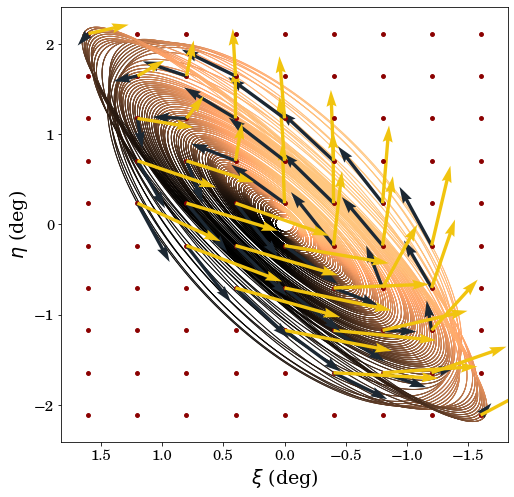

In [95]:
plt.figure(figsize=(8, 8))
#Plot the background:
for i in range(len(x)):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)

#Plot the mesh and the vectors:
for i in range(len(xcoord)):
    for j in range(len(ycoord[0])):
        plt.scatter(xcoord[i][j], ycoord[i][j], c='darkred', s=15)
        if B[i][j][0] != 0:
            plt.quiver(xcoord[i][j], ycoord[i][j], B[i][j][0]*0.003, B[i][j][1]*0.003, angles='xy', scale_units='xy', scale=1, color='#1c2833') 
            plt.quiver(xcoord[i][j], ycoord[i][j], B_helio[i][j][0]*0.003, B_helio[i][j][1]*0.003, angles='xy', scale_units='xy', scale=1, color='#f1c40f') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 19)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 19)
plt.gca().invert_xaxis()
#plt.savefig('Andro_VS_Helio(Arrows).png', dpi=250)
plt.show()

### Radial velocity

In [89]:
#Intruction to make a colormap based on the z component of the velocity
x_points   = []
y_points   = []
colour_map = [[], [], [], [], []] #For the different velocity component

for i in range(len(B)):
    for j in range(len(B[0])):
        if B[i][j][0] != 0:
            x_points.append(xcoord[i][j])
            y_points.append(ycoord[i][j])
            colour_map[0].append(B[i][j][0])        #µ_alpha not corrected
            colour_map[1].append(B[i][j][1])        #µ_delta not corrected
            colour_map[2].append(B_helio[i][j][0])  #µ_alpha corrected
            colour_map[3].append(B_helio[i][j][1])  #µ_delta corrected
            colour_map[4].append(-B_helio[i][j][2]) #µ_radial 

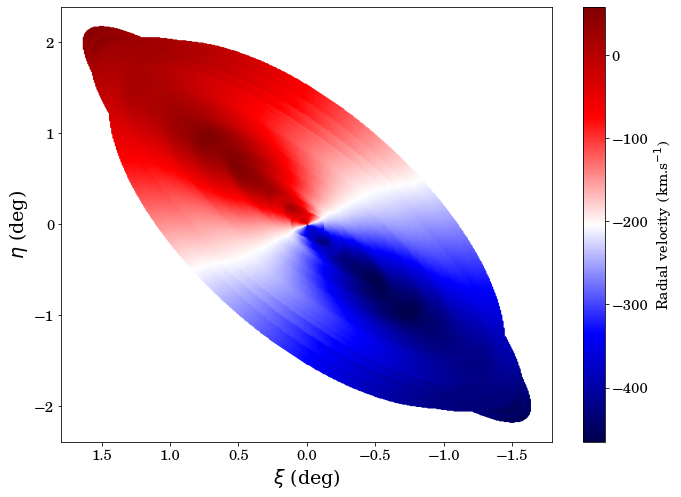

In [92]:
plt.figure(figsize=(11, 8))
#Plot the mesh and the vectors:
plt.scatter(x_points, y_points, c=colour_map[4], cmap='seismic', s=5, linewidth=0)
    
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'Radial velocity (km.s$^{-1}$)', fontsize=15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 19)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 19)
plt.gca().invert_xaxis()
plt.savefig('Radial_Velocity.png', dpi=250)
plt.show()

### Transverse velocity

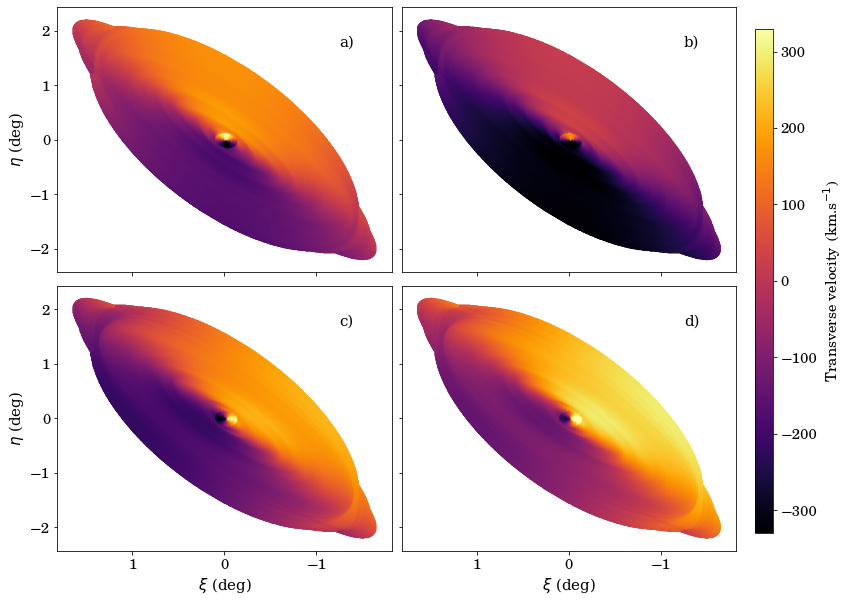

In [91]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(13, 10))
plt.subplots_adjust(right=0.85)

pos = ax1.scatter(x_points, y_points, c=colour_map[0], cmap='inferno',
                  vmin=np.min(colour_map[0]), vmax=np.max(colour_map[0]), s=15, linewidth=0)
ax1.text(-1.25, 1.70, f'a)', color='black', fontname = 'Serif', size = 15)
ax1.set_ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 15)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)

pos = ax2.scatter(x_points, y_points, c=colour_map[2], cmap='inferno',
                    vmin=np.min(colour_map[0]), vmax=np.max(colour_map[0]), s=15, linewidth=0)
ax2.text(-1.25, 1.70, f'b)', color='black', fontname = 'Serif', size = 15)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)

pos = ax3.scatter(x_points, y_points, c=colour_map[1], cmap='inferno',
                  vmin=np.min(colour_map[1]), vmax=np.max(colour_map[1]), s=15, linewidth=0)
ax3.text(-1.25, 1.70, f'c)', color='black', fontname = 'Serif', size = 15)
ax3.set_xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 15)
ax3.set_ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 15)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)

pos = ax4.scatter(x_points, y_points, c=colour_map[3], cmap='inferno',
                  vmin=np.min(colour_map[1]), vmax=np.max(colour_map[1]), s=15, linewidth=0)
ax4.text(-1.25, 1.70, f'd)', color='black', fontname = 'Serif', size = 15)
ax4.set_xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 15)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.set_xlim(ax4.get_xlim()[::-1])

cax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
cbar = plt.colorbar(pos, cax=cax)
cbar.set_label(r'Transverse velocity (km.s$^{-1}$)', fontsize=15)
cbar.ax.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.03, hspace=0.05)
plt.savefig('Transverse_Velocity.png', dpi=250)
plt.show()

The previous plots present the following results:

- a) $\mu_{\alpha}$ before the heliocentric correction
- b) $\mu_{\alpha}$ after the heliocentric correction
- c) $\mu_{\delta}$ before the heliocentric correction
- d) $\mu_{\delta}$ after the heliocentric correction

All the previous velocities are given in km.s$^{-1}$.

Note: the plots of the radial and transverse velocities are both done with bins with a width of 0.5'.

## Exporting the data

In [312]:
import csv

def InCVSModel(name, LIST1, LIST2, LIST3):
    #___ Description_____________________________________________________________________________________
    #Arguments:: name of the file to be read and three lists that actually contain the data
    #Returns:: list of lists with either all the velocity components as seen from Earth, or  with all the 
    #         positions of the ellipse for the model
    #____________________________________________________________________________________________________
    
    #Deals with the fact that the edges of the bins and the velocities in each bins
    if len(LIST2) == 0:
        with open('ThisIsTheData/' + name + '.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            for i in range(len(LIST1)):
                for j in range(len(LIST1[0])):
                    writer.writerow(LIST1[i][j])
    
    #Deals with the representation of the model (aka the nice looking ellipses)
    else:
        with open('ThisIsTheData/' + name + '.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            for i in range(len(LIST1)):
                for j in range(len(LIST1[0])):
                    writer.writerow([LIST1[i][j], LIST2[i][j], LIST3[i][j]])

In [313]:
#Here we simply write all the data in CVS files

#First we will store all the data related to the bins edges and the velocities in each of them
InCVSModel('x_edges', xedges, [], [])
InCVSModel('y_edges', yedges, [], [])
InCVSModel('vel', B_helio, [], [])

#Secondly, we also store everything that will allow us to plot the model over the data, this 
#step is purely for aesthetic
InCVSModel('model', X, Y, z)